In [1]:
import yfinance as yf
from datetime import date
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [2]:
def get_data(symbols, start_date, end_date):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    date_range = pd.date_range(start=start_date, end=end_date)
    df = pd.DataFrame(index=date_range)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # Use yfinance to fetch historical data
        df_temp = yf.download(symbol, start=start_date, end=end_date)
        
        # Rename the 'Close' column to the symbol name
        df_temp.rename(columns={'Close': symbol}, inplace=True)
        
        # Concatenate the data to the main DataFrame
        df = pd.concat([df, df_temp[symbol]], axis=1, sort=False)

    # Drop rows where SPY did not trade
    df.dropna(subset=['SPY'], inplace=True)
    
    return df

In [3]:
def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

    

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    daily_returns = df.pct_change()
    #daily_returns.iloc[0, :] = 0
    daily_returns.iloc[0] = 0
    return daily_returns
    # Note: Returned DataFrame must have the same number of rows

def compute_cumulative_returns(df):
    return ((df / df.iloc[0].values) - 1)

def normalized_stock(df):
    return df/df.iloc[0, :]

In [4]:
symbols = ['SPY', 'META']
df = get_data(symbols, '2023-01-01', date.today())
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,SPY,META
2023-01-03,380.820007,124.739998
2023-01-04,383.760010,127.370003
2023-01-05,379.380005,126.940002
2023-01-06,388.079987,130.020004
2023-01-09,387.859985,129.470001
...,...,...
2023-10-03,421.589996,300.940002
2023-10-04,424.660004,305.579987
2023-10-05,424.500000,304.790009
2023-10-06,429.540009,315.429993


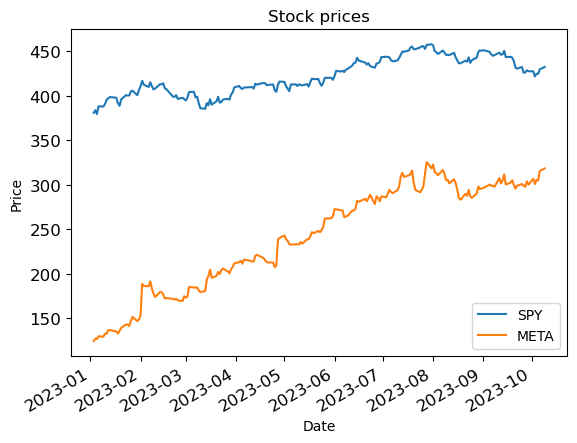

In [5]:
plot_data(df)

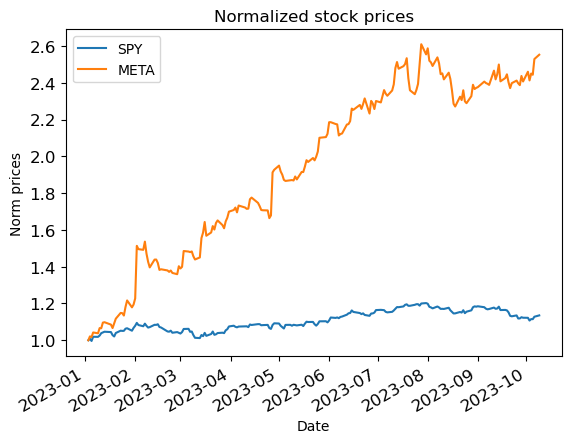

In [6]:
norm_stock = normalized_stock(df)
plot_data(norm_stock, title="Normalized stock prices", ylabel="Norm prices")

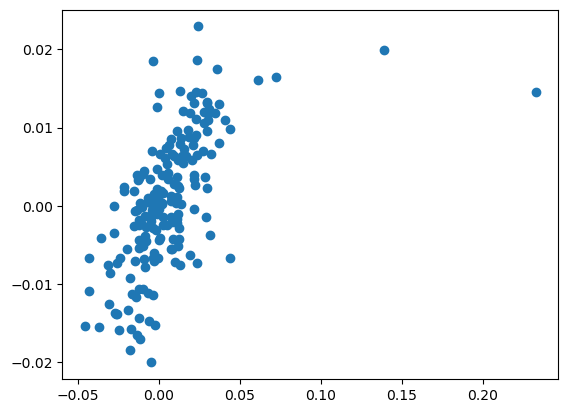

In [7]:

df['daily_ret1'] = compute_daily_returns(df['META'])
df['daily_ret2'] = compute_daily_returns(df['SPY'])

plt.scatter(df['daily_ret1'], df['daily_ret2'])

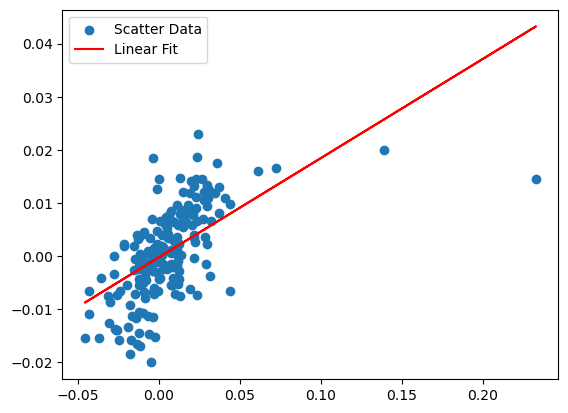

In [12]:
# Extract the data from the DataFrame
x1 = df['daily_ret1']
y1 = df['daily_ret2']



# Perform linear regression to find the slope and intercept
slope, intercept = np.polyfit(x, y, 1)

# Create a scatter plot
plt.scatter(x, y, label='Scatter Data')

# Generate the linear fit line using the slope and intercept
fit_line = slope * x + intercept

# Plot the linear fit line
plt.plot(x, fit_line, color='red', label='Linear Fit')

# Add labels and legend
#plt.xlabel('daily_ret1')
#plt.ylabel('daily_ret2')
plt.legend()

# Show the plot
plt.show()

In [14]:
slope, intercept

(0.1868888979308385, -0.0002799706779918495)

In [8]:
from scipy import stats

LR = stats.linregress(df['daily_ret1'].iloc[1:],df['daily_ret2'].iloc[1:])

In [9]:
LR

LinregressResult(slope=0.18689937795058664, intercept=-0.00028148370183357066, rvalue=0.5933425206866394, pvalue=1.2042566683144482e-19, stderr=0.01839477747164338, intercept_stderr=0.0005056113614823833)

In [10]:
beta,alpha,r_val,p_val,std_err = LR

In [11]:
beta

0.18689937795058664